In [12]:
import json 
import pandas as pd
import requests
import numpy as np

In [13]:
def get_link(page):
    
    final_link = None
    word=None
    start = 0
    
    for line in page.text.split("\n"):
        if 'http://www.worldgovernmentbonds.com/wp-admin/admin-ajax' in line:
            word=line    

    
    for i, letter in enumerate(word):
        if letter == "'":
            start = i
            for j in range(start + 1, len(word)):
                if word[j] == "'":
                    final_link = word[start+1:j]
                    break
            break
            
    return final_link

In [14]:
def create_dataframe(link):
    
    page=requests.get(link)
    data=page.json()
    values=list(data['quote'].values())
    dataframe=pd.DataFrame(np.array(values),columns=['Date','Close'])
    dataframe['Date']=pd.to_datetime(dataframe['Date'],unit='ms')
    dataframe=dataframe.set_index('Date')
    
    return dataframe

In [15]:
def get_dataframe(link):
    
    page=requests.get(link)
    json_link=get_link(page)
    
    return create_dataframe(json_link)
    

In [16]:
link='http://www.worldgovernmentbonds.com/cds-historical-data/united-kingdom/5-years/'

<AxesSubplot:xlabel='Date'>

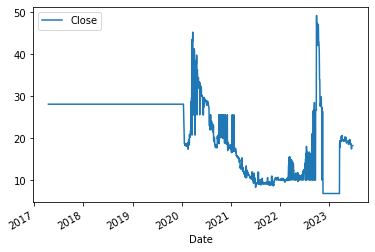

In [17]:
get_dataframe(link).plot()